# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"
# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

636

In [3]:
#Lists and counters
city_list = []
cloud_list = []
country_list = []
date_list = []
humidity_list = []
lats_list = []
lngs_list = []
temp_max_list = []
wind_speed_list = []
index_counter = 0
set_counter = 1

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

> **HINT:** The OpenWeatherMap API only allows 60 calls per minute under their free plan. Try using `time.sleep(60)` after each set of 50 cities to avoid API errors due to large calls.

In [4]:
print("Beginning Data Retrieval ")
print("-------------------------------")

base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={api_key}&units={units}&q="

#For loop matching city names with city_list using enumerate method
for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(query_url + city).json()
        city_list.append(response["name"])
        cloud_list.append(response["clouds"]["all"])
        country_list.append(response["sys"]["country"])
        date_list.append(response["dt"])
        humidity_list.append(response["main"]["humidity"])
        lats_list.append(response["coord"]["lat"])
        lngs_list.append(response["coord"]["lon"])
        temp_max_list.append(response['main']['temp_max'])
        wind_speed_list.append(response["wind"]["speed"])
        
        if index_counter > 49:
            index_counter = 0
            set_counter = set_counter + 1
        
        else:
            index_counter = index_counter + 1
        
        print(f"Processing Record {index_counter} of Set {set_counter} : {city}")
        
    except(KeyError, IndexError):
        print("City not found. Skipping...")
        
print("-------------------------------")
print("Data Retrieval Complete")
print("-------------------------------")

Beginning Data Retrieval 
-------------------------------
Processing Record 1 of Set 1 : nuuk
Processing Record 2 of Set 1 : namatanai
Processing Record 3 of Set 1 : ushuaia
Processing Record 4 of Set 1 : haines junction
Processing Record 5 of Set 1 : new norfolk
Processing Record 6 of Set 1 : harnai
Processing Record 7 of Set 1 : torbay
Processing Record 8 of Set 1 : buala
Processing Record 9 of Set 1 : north bend
Processing Record 10 of Set 1 : kaitangata
Processing Record 11 of Set 1 : rikitea
Processing Record 12 of Set 1 : sao jose da coroa grande
Processing Record 13 of Set 1 : punta arenas
Processing Record 14 of Set 1 : ancud
Processing Record 15 of Set 1 : qaanaaq
Processing Record 16 of Set 1 : vanimo
Processing Record 17 of Set 1 : vardo
City not found. Skipping...
Processing Record 18 of Set 1 : mount gambier
Processing Record 19 of Set 1 : kavieng
Processing Record 20 of Set 1 : sahuaripa
Processing Record 21 of Set 1 : chitipa
Processing Record 22 of Set 1 : east london
P

Processing Record 35 of Set 4 : deputatskiy
Processing Record 36 of Set 4 : zalesovo
Processing Record 37 of Set 4 : hofn
Processing Record 38 of Set 4 : cape town
Processing Record 39 of Set 4 : palmer
Processing Record 40 of Set 4 : kodiak
Processing Record 41 of Set 4 : pangai
City not found. Skipping...
Processing Record 42 of Set 4 : esperance
Processing Record 43 of Set 4 : le vauclin
Processing Record 44 of Set 4 : wattegama
Processing Record 45 of Set 4 : guerrero negro
Processing Record 46 of Set 4 : skibbereen
Processing Record 47 of Set 4 : christchurch
City not found. Skipping...
Processing Record 48 of Set 4 : tiksi
Processing Record 49 of Set 4 : supe
Processing Record 50 of Set 4 : vanino
Processing Record 0 of Set 5 : yulara
Processing Record 1 of Set 5 : ribeira grande
Processing Record 2 of Set 5 : severo-kurilsk
Processing Record 3 of Set 5 : san angelo
Processing Record 4 of Set 5 : aripuana
Processing Record 5 of Set 5 : olafsvik
City not found. Skipping...
Process

Processing Record 14 of Set 8 : faanui
Processing Record 15 of Set 8 : camacha
Processing Record 16 of Set 8 : ahipara
Processing Record 17 of Set 8 : naze
Processing Record 18 of Set 8 : conceicao do araguaia
Processing Record 19 of Set 8 : rundu
Processing Record 20 of Set 8 : wangaratta
Processing Record 21 of Set 8 : standerton
Processing Record 22 of Set 8 : nortelandia
Processing Record 23 of Set 8 : havre-saint-pierre
City not found. Skipping...
City not found. Skipping...
Processing Record 24 of Set 8 : moerai
Processing Record 25 of Set 8 : newala
Processing Record 26 of Set 8 : juru
Processing Record 27 of Set 8 : warri
Processing Record 28 of Set 8 : dali
Processing Record 29 of Set 8 : bainbridge
Processing Record 30 of Set 8 : chilca
Processing Record 31 of Set 8 : aksum
City not found. Skipping...
Processing Record 32 of Set 8 : tura
Processing Record 33 of Set 8 : dharchula
City not found. Skipping...
Processing Record 34 of Set 8 : nouadhibou
Processing Record 35 of Set

Processing Record 49 of Set 11 : gweru
Processing Record 50 of Set 11 : pontianak
Processing Record 0 of Set 12 : luau
Processing Record 1 of Set 12 : bongor
Processing Record 2 of Set 12 : sola
Processing Record 3 of Set 12 : bayir
Processing Record 4 of Set 12 : piopio
Processing Record 5 of Set 12 : san matias
Processing Record 6 of Set 12 : grand gaube
Processing Record 7 of Set 12 : mount pleasant
Processing Record 8 of Set 12 : saint-pierre
Processing Record 9 of Set 12 : maloyaroslavets
Processing Record 10 of Set 12 : coaldale
Processing Record 11 of Set 12 : manokwari
Processing Record 12 of Set 12 : bud
Processing Record 13 of Set 12 : nargana
Processing Record 14 of Set 12 : yinchuan
Processing Record 15 of Set 12 : shepsi
Processing Record 16 of Set 12 : harper
Processing Record 17 of Set 12 : eureka
Processing Record 18 of Set 12 : lanxi
Processing Record 19 of Set 12 : huarmey
Processing Record 20 of Set 12 : barra patuca
Processing Record 21 of Set 12 : limerick
--------

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
 #Create a dataframe using information from data retrieval
weather_data = pd.DataFrame({
    "City" : city_list,
    "Lat" : lats_list,
    "Lng" : lngs_list,
    "Max Temp" : temp_max_list,
    "Humidity" : humidity_list,
    "Clouds" : cloud_list,
    "Wind Speed" : wind_speed_list,
    "Country" : country_list,
    "Date" : date_list    
})

In [6]:
#Count weather data
weather_data.count()

City          582
Lat           582
Lng           582
Max Temp      582
Humidity      582
Clouds        582
Wind Speed    582
Country       582
Date          582
dtype: int64

In [7]:
#Display dataframe
weather_data.head()

City      Lat       Lng  Max Temp  Humidity  Clouds  Wind Speed  \
0             Nuuk  64.1835  -51.7216     23.61        93     100        9.22   
1        Namatanai  -3.6667  152.4333     78.55        80      99        8.81   
2          Ushuaia -54.8000  -68.3000     47.82        52      69        6.98   
3  Haines Junction  60.7522 -137.5108     -4.40        99     100        2.19   
4      New Norfolk -42.7826  147.0587     48.70        71       9        2.64   

  Country        Date  
0      GL  1643911667  
1      PG  1643911081  
2      AR  1643911544  
3      CA  1643911667  
4      AU  1643911668

In [17]:
 #Save weather data to a cities csv file
#weather_data.to_csv("output_data/cities.csv", index=False)
# Output File (CSV)
output_data_file = "output_data/cities.csv"

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [18]:
#  Get the indices of cities that have humidity over 100%.


In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

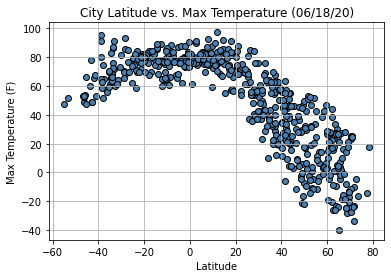

In [20]:
 #Latitude vs. Temperature Plot scatter plot
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], color = "steelblue", edgecolor = "black")

plt.title("City Latitude vs. Max Temperature (06/18/20)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)
plt.savefig("../Images/City Latitude vs Max Temperature.png")

## Latitude vs. Humidity Plot

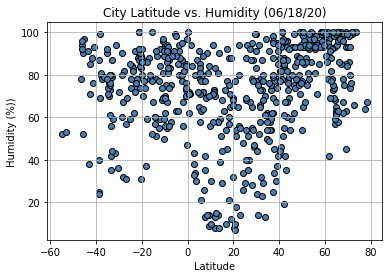

In [21]:
 #Latitude vs. Humidity Plot scatter plot
plt.scatter(weather_data["Lat"], weather_data["Humidity"], color = "steelblue", edgecolor = "black")

plt.title("City Latitude vs. Humidity (06/18/20)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%))")
plt.grid(True)
plt.savefig("../Images/City Latitude vs Humidity.png")

## Latitude vs. Cloudiness Plot

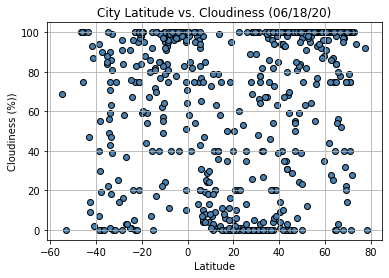

In [22]:
#Latitude vs. Cloudiness Plot scatter plot
plt.scatter(weather_data["Lat"], weather_data["Clouds"], color = "steelblue", edgecolor = "black")

plt.title("City Latitude vs. Cloudiness (06/18/20)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%))")
plt.grid(True)
plt.savefig("../Images/City Latitude vs Cloudiness.png")

## Latitude vs. Wind Speed Plot

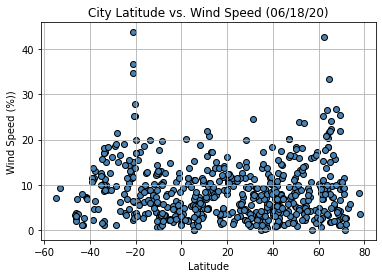

In [23]:
#Latitude vs. Wind Speed Plot scatter plot
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], color = "steelblue", edgecolor = "black")

plt.title("City Latitude vs. Wind Speed (06/18/20)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (%))")
plt.grid(True)
plt.savefig("../Images/City Latitude vs Wind Speed.png")

## Linear Regression

In [35]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemisphere = weather_data.loc[weather_data["Lat"] >= 0]
southern_hemisphere = weather_data.loc[weather_data["Lat"] < 0]
weather_data

City      Lat       Lng  Max Temp  Humidity  Clouds  \
0               Nuuk  64.1835  -51.7216     23.61        93     100   
1          Namatanai  -3.6667  152.4333     78.55        80      99   
2            Ushuaia -54.8000  -68.3000     47.82        52      69   
3    Haines Junction  60.7522 -137.5108     -4.40        99     100   
4        New Norfolk -42.7826  147.0587     48.70        71       9   
..               ...      ...       ...       ...       ...     ...   
577           Eureka  40.8021 -124.1637     50.20        82     100   
578            Lanxi  29.2195  119.4770     36.99        99     100   
579          Huarmey -10.0681  -78.1522     77.02        69      92   
580     Barra Patuca  15.8000  -84.2833     82.17        63       8   
581         Limerick  52.6647   -8.6231     52.09        81      98   

     Wind Speed Country        Date  
0          9.22      GL  1643911667  
1          8.81      PG  1643911081  
2          6.98      AR  1643911544  
3          2.19      CA  1643911667  
4          2.64      AU  1643911668  
..          ...     ...         ...  
577        3.00      US  1643911832  
578        1.36      CN  1643911832  
579       12.93      PE  1643911833  
580        8.68      HN  1643911833  
581       18.19      IE  1643911584  

[582 rows x 9 columns]

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression